notebook on IL2RA Run 2

In [2]:
Experiment <- "IL2RA"

# Load Libraries

In [2]:
suppressPackageStartupMessages({
    library(gdata)
    library(singlecellmethods)
    library(matrixStats)
    library(data.table)
    library(viridis)
    #library(seaborn)
    library(RColorBrewer)
    library(ComplexHeatmap)
    library(Matrix)
    library(harmony)
    library(uwot)
    library(irlba)
    library(Seurat)
    library(factoextra)
    library(presto) 
    source("//Users/bagtq9/Desktop/Box Sync/2017 - Raychaudhuri Lab/Lab Documents/scRNA-DNA GSK/Experiments/UpdatedExperiments/2023-04-03 PTEN-DQB1-FBXO11/Analysis/utils.R")
    source("//Users/bagtq9/Desktop/Box Sync/2017 - Raychaudhuri Lab/Lab Documents/scRNA-DNA GSK/Experiments/UpdatedExperiments/2023-04-03 PTEN-DQB1-FBXO11/Analysis/misc_funcs.R")
    library(tidyverse)
    library(ggpubr)
    library(ggridges)
    library(ggrepel)
})

# Load All libraries. Skip steps below

In [3]:
FlowMatrix <- read_csv("FlowMatrixFinal.csv")

Rows: 6144 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (13): Well_ID, DNA_cell, RNA_cell, Experiment_Index, Plate, Polarization...
dbl (12): SparkUV_CD45, PB_CD45, BV510_CD45, BV605_CD45, BV750_CD45, FSC, FI...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [186]:
#Load Meta RNA
meta <- read_csv("meta.csv")

Rows: 6144 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): plate, cell, PlateLabel, Condition, DNA_Barcode, ADT_Barcode, sgRN...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [189]:
#Import RNA
exprs <- readMM(file = "exprs.mtx")
colnames(exprs) <- read_csv("exprs_colnames.csv") %>% with(x)
rownames(exprs) <- read_csv("exprs_rownames.csv") %>% with(x)

New names:
• `` -> `...1`
Rows: 6144 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): x
dbl (1): ...1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 36591 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): x
dbl (1): ...1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [200]:
meta_adt_filt <- read_csv("meta_ADT_filt.csv")

Rows: 3848 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): plate, cell_adt, PlateLabel, Condition, RNA_Barcode, DNA_Barcode, ...
dbl  (2): nUMI, nGenes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [188]:
#Import ADT
meta_adt_filt <- read_csv("meta_ADT_filt.csv")
counts_adt_filt <- readMM(file = "counts_ADT_filt.mtx")
colnames(counts_adt_filt) <- read_csv("colnames_counts_ADT_filt.csv") %>% with(x)
rownames(counts_adt_filt) <- read_csv("rownames_counts_ADT_filt.csv") %>% with(x)


Rows: 3848 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): plate, cell_adt, PlateLabel, Condition, RNA_Barcode, DNA_Barcode, ...
dbl  (2): nUMI, nGenes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 3863 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): x
dbl (1): ...1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 154 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): x
dbl (1): ...1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE`

In [9]:
#Add DNA
meta_DNA <- read_csv("CIITA_TBET_FOXP3_IL2RA_BACH2Meta.csv")
alleles_DNA <- read_csv("alleles_DNA_Trim.csv")
#Add Meta 
alleles_DNA_meta<- inner_join(alleles_DNA, meta_DNA)

Rows: 17 Columns: 9
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (9): PlateLabel, Condition, RNA_Barcode, DNA_Barcode, ADT_Barcode, sgRNA...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 3765 Columns: 8
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): DNA_Barcode, Well_ID, Aligned_Sequence
dbl (5): n_deleted, n_inserted, n_mutated, #Reads, %Reads

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Joining with `by = join_by(DNA_Barcode)`


In [208]:
filt_meta <- read_csv("filt_meta.csv")

Rows: 4029 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): plate, cell, PlateLabel, Condition, DNA_Barcode, ADT_Barcode, sgRN...
dbl  (3): nUMI, nGenes, pctMito

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
DNAfiles = "Analysis/AllelesR2Trim"

In [9]:
#Add reference, and add metadata
meta_DNA <- read_csv("CIITA_TBET_FOXP3_IL2RA_BACH2Meta.csv")

Rows: 17 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): PlateLabel, Condition, RNA_Barcode, DNA_Barcode, ADT_Barcode, sgRNA...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
#Full function going to Allele Feq Table to Matrix for Analysis. 
AllelesFunction <- function(filepath){ 

    files <- list.files(path = filepath, 
                         pattern = ".txt$", 
                         full.names = T, 
                         recursive = T)
    
    matrix <- suppressMessages({suppressWarnings({lapply(files, read_tsv, n_max=10, col_select = c(1,5,6,7,8,9))
        })})

    names(matrix) <- paste0(str_split(files,pattern = "on_|/", simplify = T)[,c(3)], 
                            "_",
                            str_split(files,pattern = "on_|/", simplify = T)[,c(7)])
    
    matrix <- bind_rows(matrix, .id = 'Plate_Well')
    
    return(matrix)
    }


In [10]:
#Upload all Alleles
alleles_DNA_Trim <- AllelesFunction(DNAfiles)

In [12]:
#Seperate PlateWell
alleles_DNA_Trim<- alleles_DNA_Trim %>% separate(Plate_Well, into = c("DNA_Barcode", "Well_ID"))
#Save this file for later use
write_csv(alleles_DNA_Trim, "alleles_DNA_Trim.csv")

In [13]:
#Add Meta 
alleles_DNA_meta<- inner_join(alleles_DNA_Trim, meta_DNA)

Joining with `by = join_by(DNA_Barcode)`


# DNA Analysis

In [17]:
source("../DNA_filtering_Functions.R")

In [23]:
IL2RA_alleles_DNA <- dplyr::rename(IL2RA_alleles_DNA,  Barcode_DNA = DNA_Barcode)

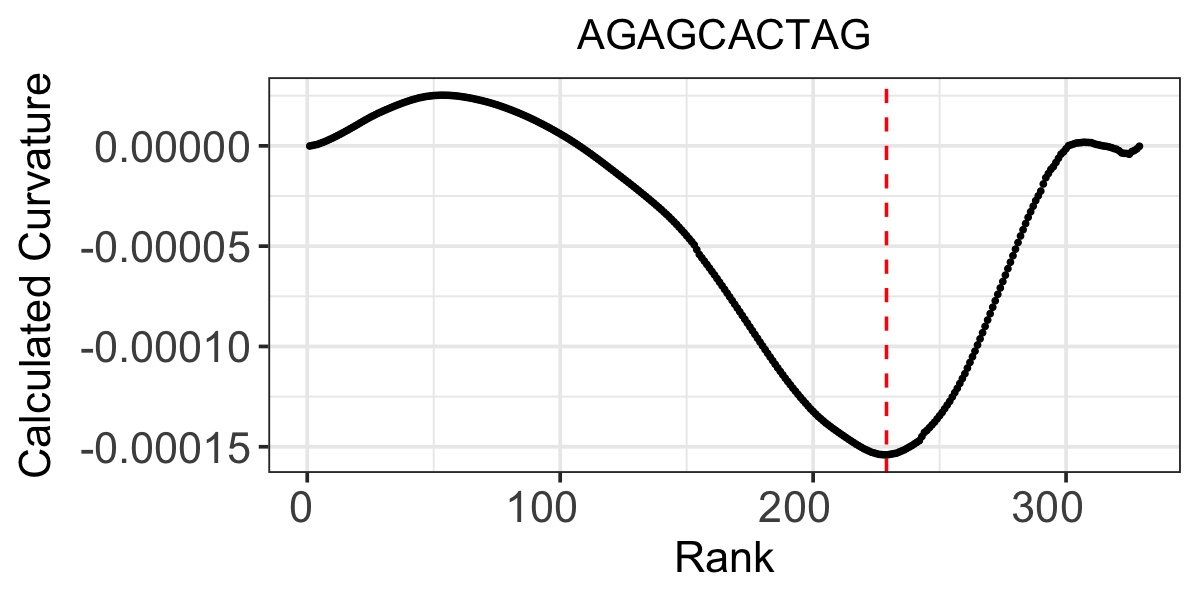

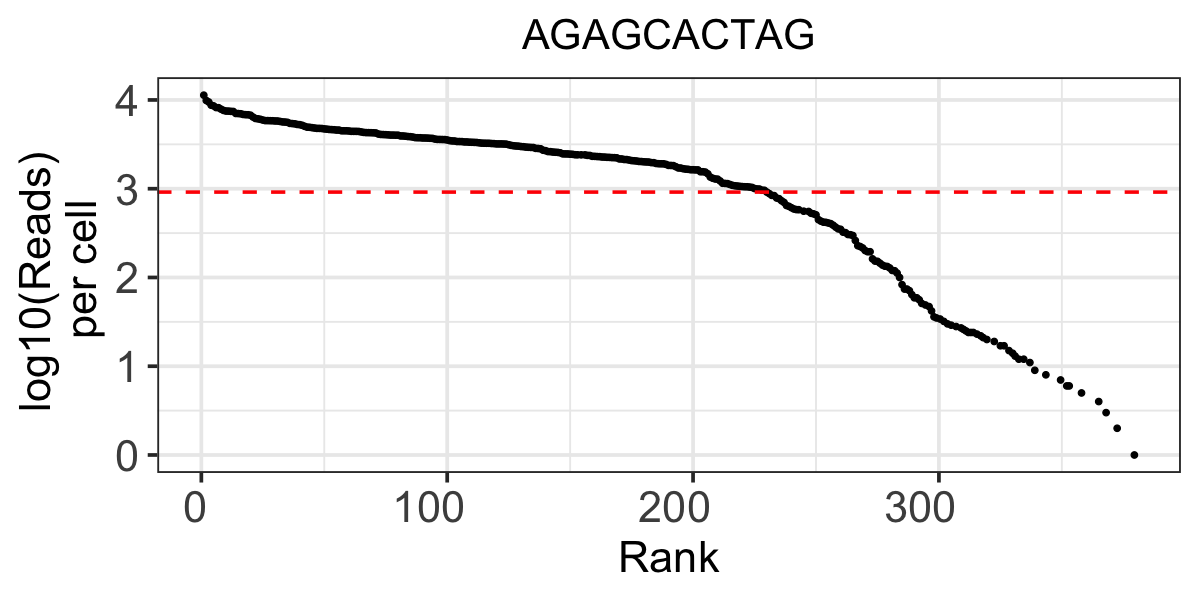

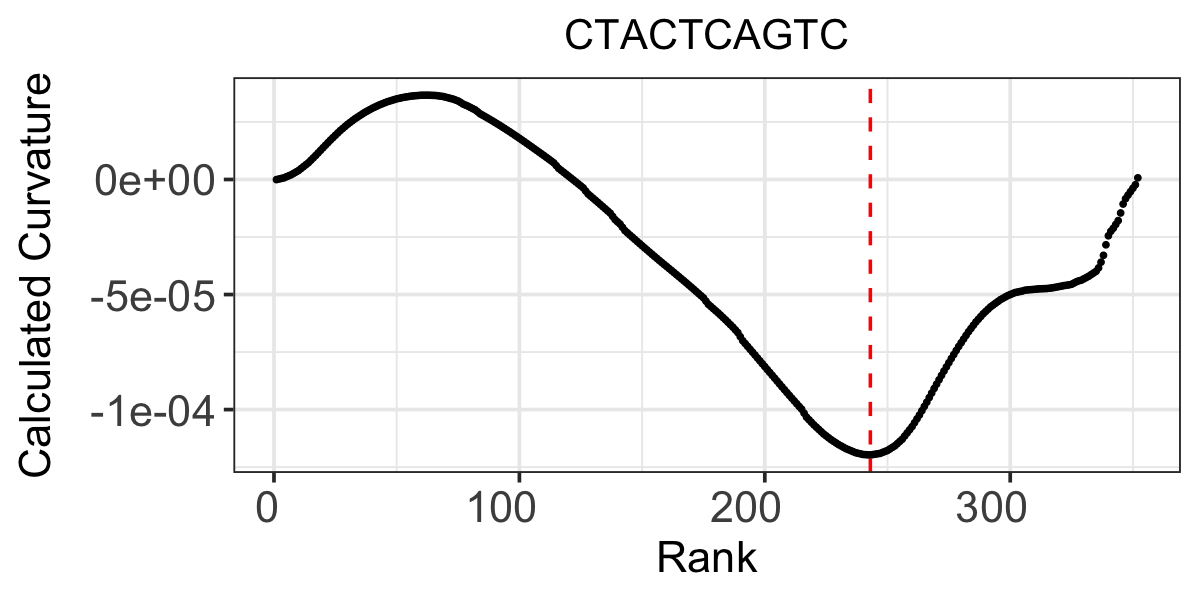

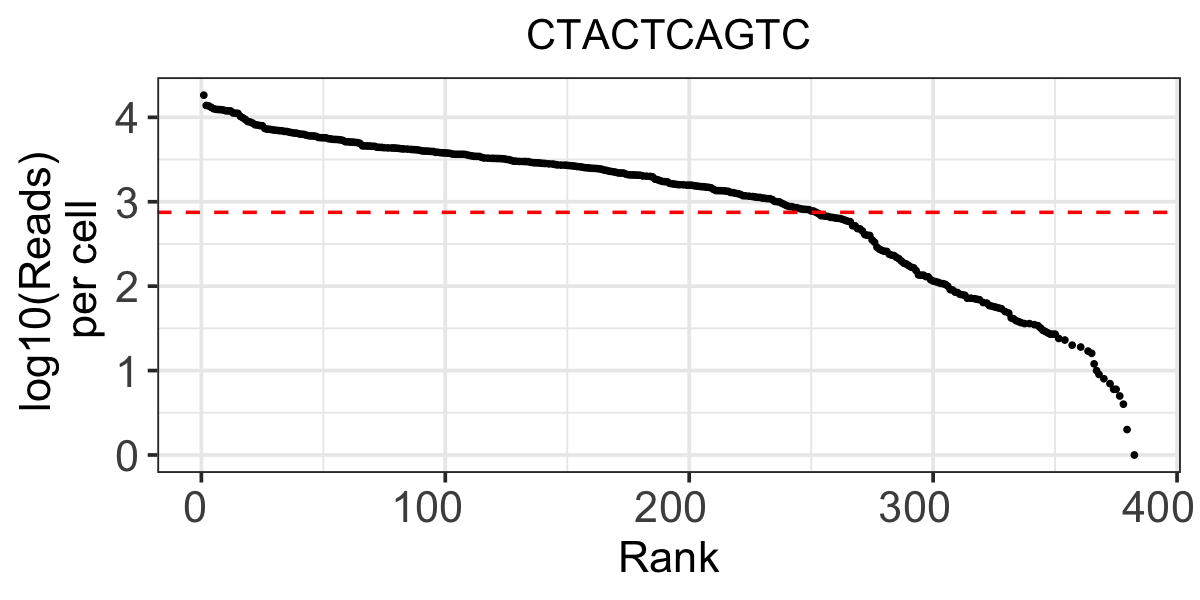

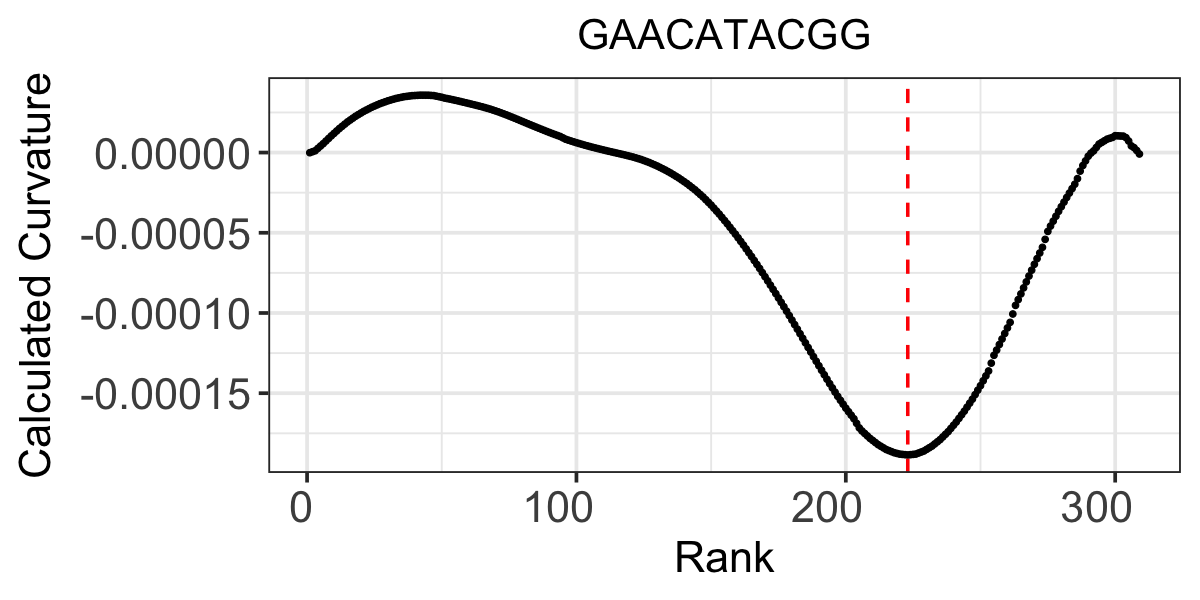

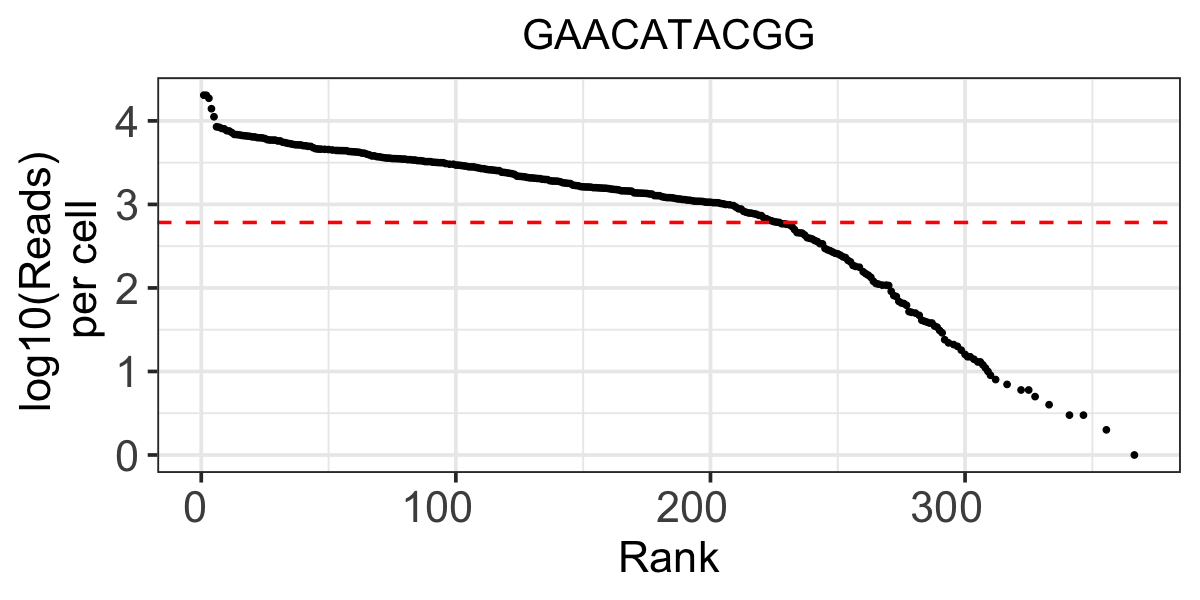

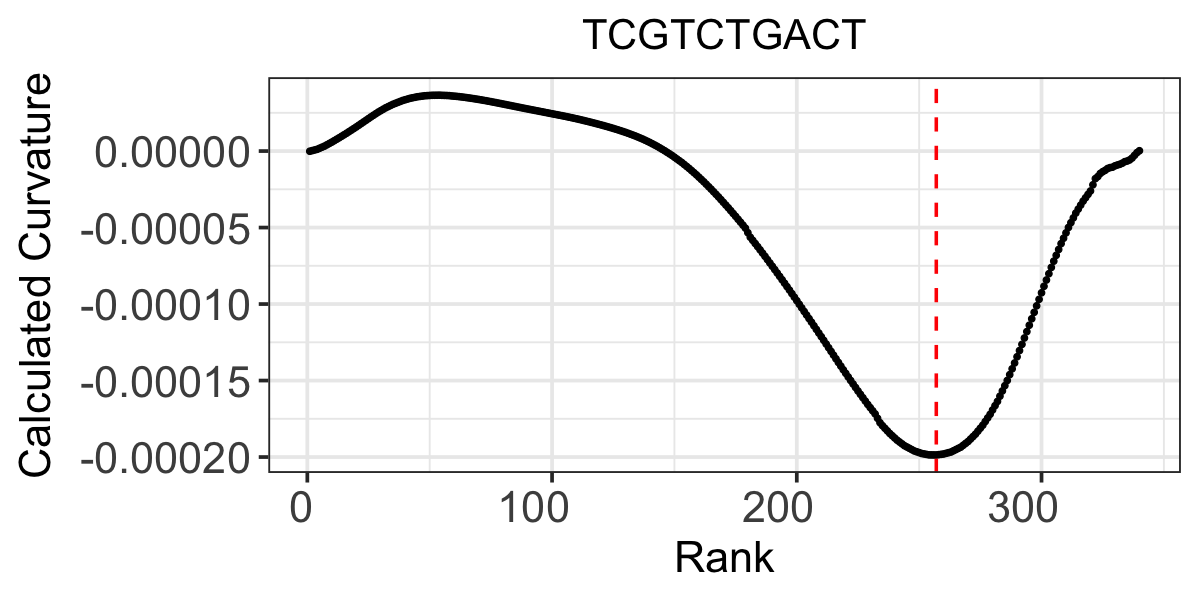

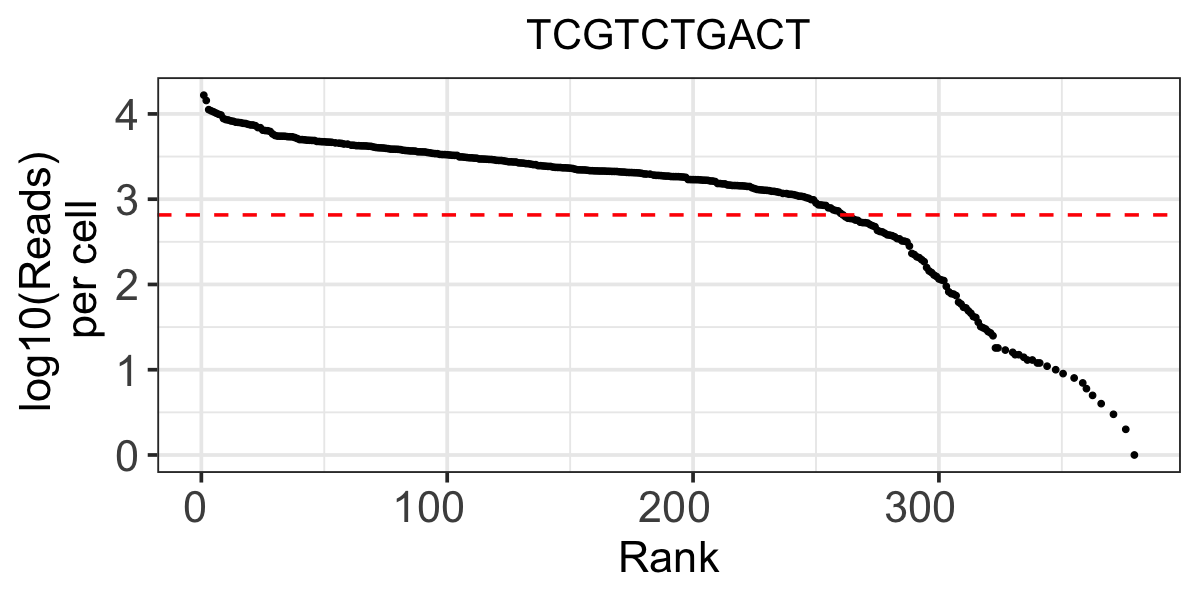

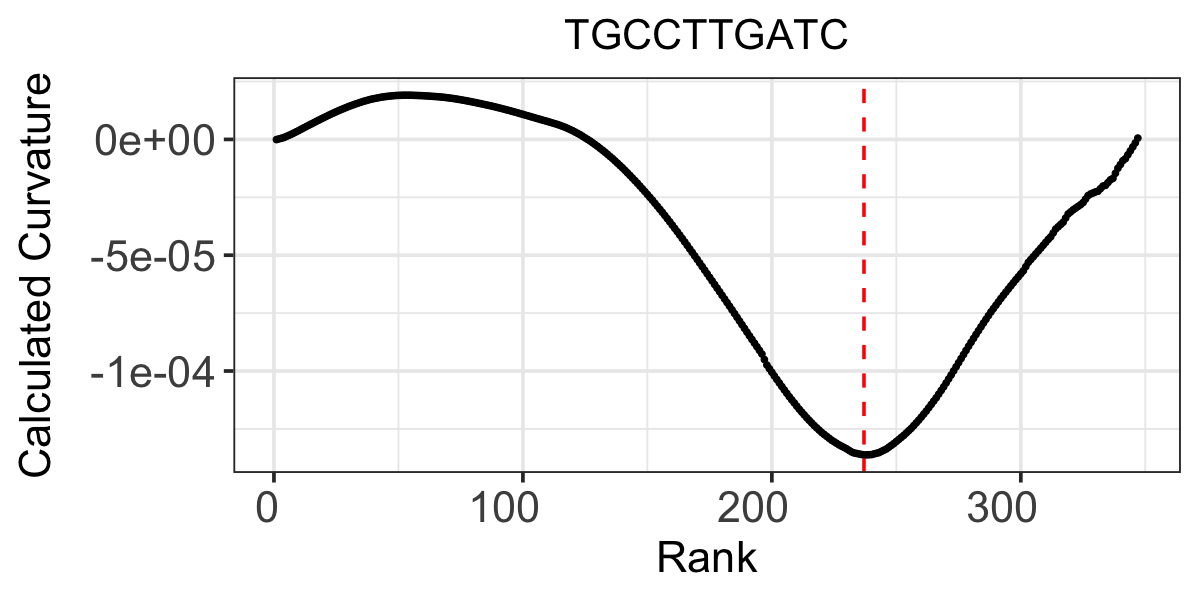

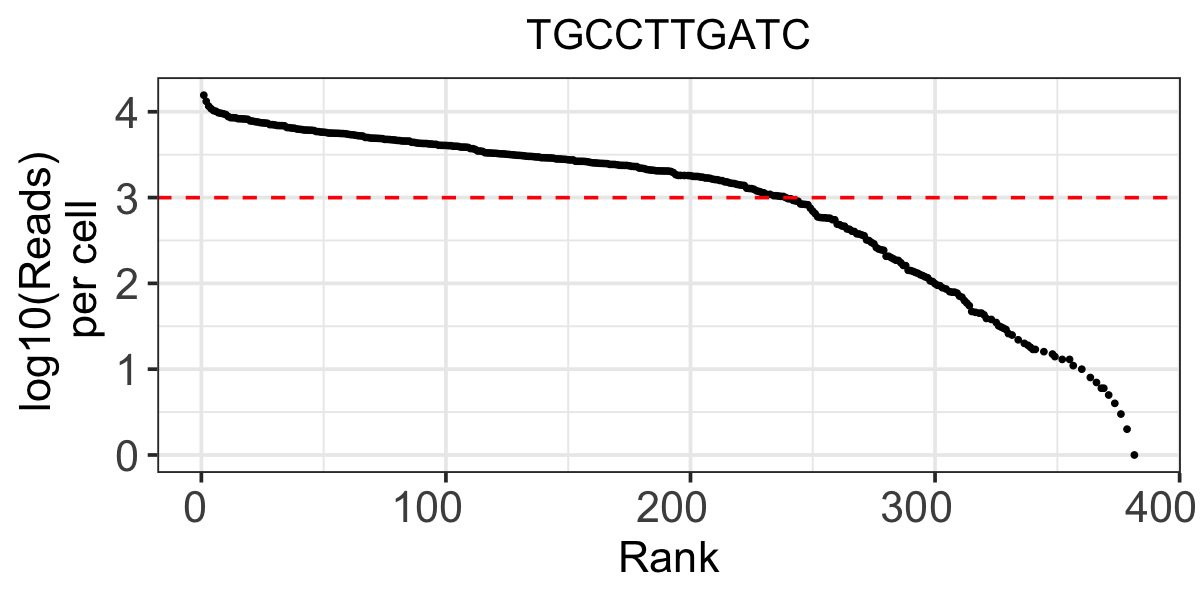

In [25]:
IL2RA_alleles_DNA_filt <- IL2RA_alleles_DNA %>% Filtering_Cells_Read

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


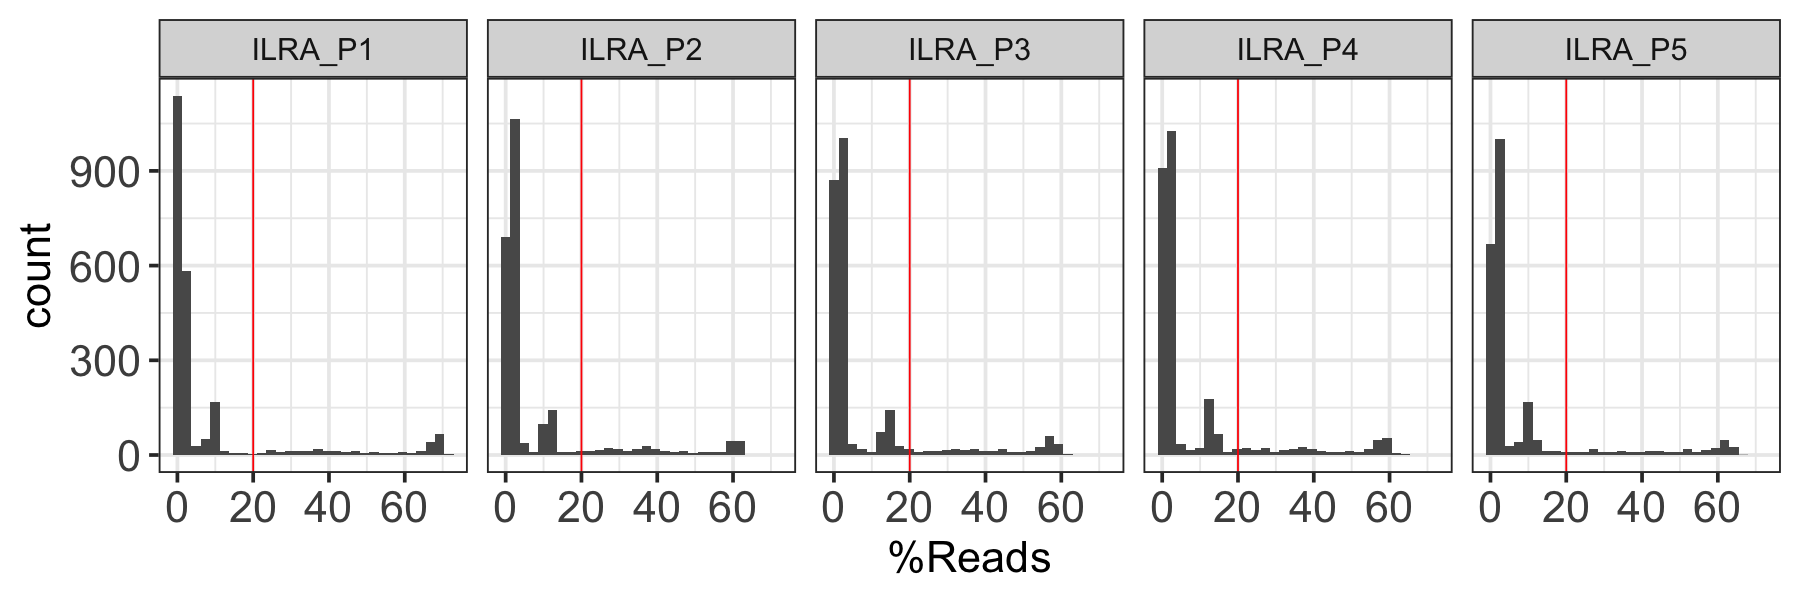

In [32]:
fig.size(5,15)
#Define a cutoff
IL2RA_alleles_DNA_filt%>% 
    ggplot(aes(`%Reads`)) + geom_histogram() + 
    theme_gy() + geom_vline(xintercept = 20, color = "red") + facet_grid(~PlateLabel)

In [34]:
IL2RA_alleles_DNA_filt <- Filtering_Alleles(IL2RA_alleles_DNA_filt, cutoff = 20)

In [36]:
IL2RA_alleles_DNA_filt <- mutate(IL2RA_alleles_DNA_filt, 
                            Reference = "GGCACACACCTATCCTAGCCTTTGTTTTTTTATTGCTGAGAGTACAGAAAGCAGCGGCTTCTGAAGGAGGTATCTATTTTGGTCCCAAACAGAAAAGAGTGGGTG")

#Fix length from P7
IL2RA_alleles_DNA_filt<- IL2RA_alleles_DNA_filt %>% 
    mutate("Aligned_Sequence" = str_trunc(Aligned_Sequence, 50, "left", ellipsis = "")) %>% 
    mutate("Reference"= str_trunc(Reference, 50, "left", ellipsis = ""))%>% 
    mutate("Aligned_Sequence" = str_trunc(Aligned_Sequence, 40, "right", ellipsis = "")) %>% 
    mutate("Reference"= str_trunc(Reference, 40, "right", ellipsis = ""))

In [39]:
## Remove alleles found in less than 5 cells. 
IL2RA_alleles_DNA_filt <- IL2RA_alleles_DNA_filt  %>% add_count(name = "AlleleCount", Aligned_Sequence) %>% filter(AlleleCount >5)

In [225]:
IL2RA_alleles_DNA_filt %>% Plotting_Alleles %>% ggsave(filename = "IL2RA_gen.png")

Saving 7 x 7 in image
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Unable to calculate text width/height (using zero)”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Unable to calculate text width/height (using zero)”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Unable to calculate text width/height (using zero)”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Unable to calculate text width/height (using zero)”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Unable to calculate text width/height (using zero)”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Unable to calculate text width/height (using zero)”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“Unable to calculate text width/height (using zero)”
Warning message in grid.Call(C_te

In [102]:
IL2RA_gen <- Genotyping_Cells(IL2RA_alleles_DNA_filt)

In [103]:
IL2RA_gen <- IL2RA_gen %>% add_count(AllelicGenotype,name = "CellperGenotype") %>% filter(CellperGenotype>5)

Joining with `by = join_by(plate_well)`
`summarise()` has grouped output by 'as.factor(Edited_Index)',
'as.factor(Individual_Index)'. You can override using the `.groups` argument.
Joining with `by = join_by(genotype, Individual_Index, Edited_Index)`


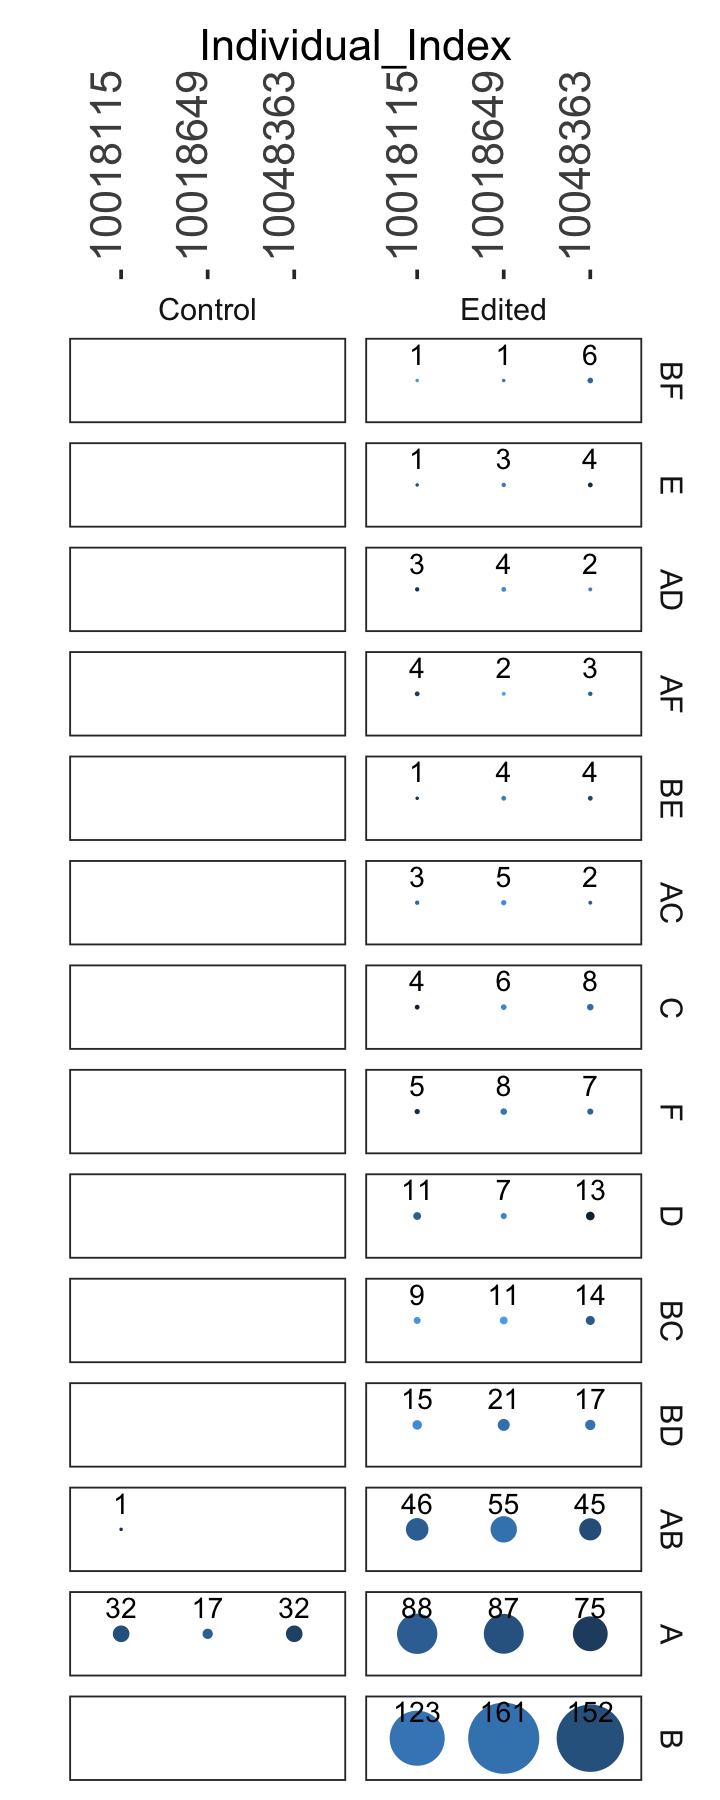

In [115]:
#Quick plot with flow cytometry data. 
test2 <- 
FlowMatrix %>% mutate(FlowMatrix, plate_well = paste0(DNA_Barcode, Well_ID)) %>% inner_join(IL2RA_gen) %>% filter(Individual_Index != "Error")

#Defineplotting Order
order <- test2$AllelicGenotype %>% table %>% as_data_frame %>% arrange(`n`)
order <- as.character(order$`.`)


fig.size(15,6)
g <- 

table(test2$AllelicGenotype, test2$Individual_Index, test2$Edited_Index) %>% 
as.data.frame() %>% rename(Individual_Index = Var2, Edited_Index = Var3, genotype = Var1) %>% 
inner_join( 
test2 %>% group_by(as.factor(Edited_Index), as.factor(Individual_Index), as.factor(AllelicGenotype)) %>% 
    summarise(mean(PE_CD25)) %>% rename(Individual_Index = `as.factor(Individual_Index)`, 
                                          Edited_Index = `as.factor(Edited_Index)`, genotype = `as.factor(AllelicGenotype)`)
)%>% na.omit%>% {
    
    ggplot(., aes(Individual_Index, 
                  fill = log10(`mean(PE_CD25)`), size = Freq)) +
      geom_point(aes(y = 0),shape = 21, stroke = 0) +
      #geom_hline(yintercept = seq(.5, 4.5, 1), size = .2) +
  scale_x_discrete(position = "top") +
  scale_radius(range = c(1,20)) +
    geom_text(aes(y = 0, label = Freq), size =6, vjust = -0.8)+
  theme_gy() +
  theme(legend.position = "none", 
        panel.grid.major = element_blank(),
        legend.text = element_text(size = 8),
        legend.title = element_text(size = 8), 
       axis.text.x = element_text(angle = 90)) + 
    ylab("") + 
    scale_y_discrete(expand = c(0.1,0.5)) + 
    facet_grid(factor((genotype), levels = order)~Edited_Index) + 
    theme(
  strip.background = element_blank(),
  #strip.text.x = element_blank(), 
    #panel.border=element_blank(), 
   # strip.text.y = element_blank()  
        )
} 
plot(g)
suppressWarnings({ 
    ggsave(g, filename = "IL2RAGenotypes_Counts_FITC_legend.png", device = "png", dpi = 300, width = 6, height = 15)
    })

In [47]:
meta <- read_csv("filt_meta.csv")

Rows: 4029 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): plate, cell, PlateLabel, Condition, DNA_Barcode, ADT_Barcode, sgRN...
dbl  (3): nUMI, nGenes, pctMito

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [48]:
meta <- filter(meta, Condition == "IL2Ra")

In [49]:
meta <- inner_join(meta, FlowMatrix)

Joining with `by = join_by(cell, PlateLabel, DNA_Barcode, ADT_Barcode)`


In [53]:
IL2RA_gen <- Genotyping_Cells(IL2RA_alleles_DNA_filt)

# Make meta DNA file for analysis and omitting all genotypes that aren't 0,1,2

In [214]:
Run2meta <- FlowMatrix %>% 
mutate(FlowMatrix, plate_well = paste0(DNA_Barcode, Well_ID)) %>% inner_join(IL2RA_gen) %>% filter(Individual_Index != "Error") %>% 
inner_join(read_csv("RNA_ADT_Barcodes.csv")) %>% 
mutate(cell = paste0(RNA_cell, "_", RNA_Barcode))%>% 
inner_join(select(filt_meta,cell, nUMI, nGenes),by = "cell")%>% 
mutate(Dosage = ifelse(AllelicGenotype == "A", 0, ifelse(AllelicGenotype == "B", 2, ifelse(AllelicGenotype == "AB", 1, NA)))) %>% 
na.omit %>%  inner_join(
select(meta_adt_filt, nUMI, cell) %>% dplyr::rename(nUMI_ADT = nUMI), by="cell")

Joining with `by = join_by(plate_well)`
Rows: 384 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Well_ID, RNA_cell

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Joining with `by = join_by(Well_ID, RNA_cell)`


In [217]:
write_csv(Run2meta, "Run2meta_updated.csv")